In [6]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
df = pd.read_csv('datasets/Asheville/Asheville-processed.csv')

In [12]:
amn_cols = [col for col in df.columns if col.startswith('AMN_')]

In [98]:
amn_df = df.loc[:, amn_cols].sort_values(amn_cols)
amns_in_freq_order = amn_df.sum().sort_values(ascending = False).index
amn_df = amn_df.reindex_axis(amns_in_freq_order, axis=1)

amns_not_too_common = amn_df.columns[amn_df.sum()<n*0.9]
data_df = amn_df.loc[:, amns_not_too_common].T
print(data_df.shape)
print([int(i/2) for i in data_df.shape])

(39, 696)
[19, 348]


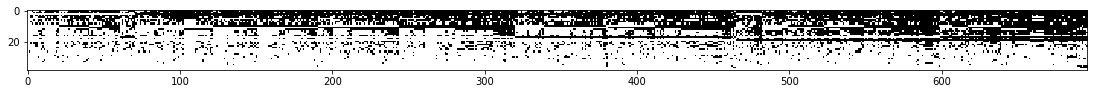

In [99]:
fig, ax = plt.subplots(figsize=[int(i/2) for i in data_df.shape])
#plt.yticks(data_df.index, data_df, fontsize='small')
ax.imshow(data_df, cmap=plt.cm.gray_r, interpolation='none')
plt.show()

In [ ]:
#from sklearn.neighbors import NearestNeighbors
#nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)

In [130]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

from sklearn.preprocessing import Normalizer
nml = Normalizer()

amn_pca = pca.fit_transform( nml.fit_transform( amn_df ) )

amn_pca_df = pd.DataFrame(amn_pca)
print(amn_pca_df.shape)
amn_pca_df.head()

(696, 3)


,0,1,2
0,-0.104289,0.138639,0.165551
1,-0.166247,0.259486,0.185090
2,-0.251236,0.102370,0.332033
3,-0.267511,-0.231966,0.173593
4,-0.203093,0.448444,0.400758


In [131]:
amn_pca_df.to_csv('datasets/Asheville/amn_pca.csv', index = False, header=False)

In [146]:
amn_df.to_csv('datasets/Asheville/amn.csv', index = False, header=True)

PCA

In [138]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [139]:
amns = amn_df.as_matrix()

Scaling the values...
Fit PCA...
Cumulative Variance explains...
Plotting...


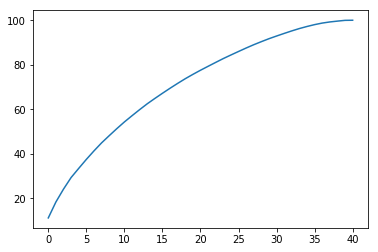

In [145]:
print("Scaling the values...")
amns_scaled = scale(amns)

print("Fit PCA...")
pca = PCA(n_components='mle')
pca.fit(amns_scaled)

print("Cumulative Variance explains...")
var1 = np.cumsum(pca.explained_variance_ratio_*100)   #The amount of variance that each PC explains

print("Plotting...")
plt.plot(var1)
plt.show()